<a href="https://colab.research.google.com/github/mqquiroz/HUCLAM/blob/main/Dise%C3%B1o_Hidraulico_HUCLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes
g     = 9.81
rho   = 1000
gamma = rho*g
nu    = 1e-6

##Proyecto HUCLAM:Solución basada en la naturaleza para mitigar el impacto negativo de las descargas de agua mixta (residual + lluvia) en cuerpos hídricos naturales

### Concurso IDeA I+D 2022

#### Tiempo de descarga desde un tanque cilíndrico

In [120]:
#Tiempo de Descarga, Drenaje de un tanque Cilindrico
#Supuestos:
#Fluido Inviscido
#Siguiendo uan linea de corriente
#Fluido Incompresible

#Inputs
#Altura inicial (cota) del tanque Cilindrico
h0 = 3.0 #(m)
#Altura final (cota) de la tubería de descarga
hf = 0.0 #(m)
#Diametro del Tanque
D1 = 1.8 #(m)
#Diámetro de la tuberia de descarga
D2 = 63/1000 #(m) - 63 mm (PVC)


#------------------------------------------------------
t = (2/np.sqrt(2*g))* ((D1/D2)**2) * ( np.sqrt(h0) - np.sqrt(hf)) #(sec)
t = t/(60) #(min)

print('El tiempo de vaciado es: ',np.round(t,2),' min')

El tiempo de vaciado es:  10.64  min


#### Diámetros de orificios

In [117]:
#Inputs

#Caudales por unidad de área requeridos
q = np.array([0.01, 0.03, 0.05]) #(lt/s*m2)
#Area seccion cuadrada
A = 2.4*2.4 #(m2)
#Volumen estanque
Vol = 3000 #(litros)
h0 = 0.3 + 0.8 #(m)
hf = 0.0 #(m)
#diametro (asumido) estanque
D1 = 2.4 #(m)

#-------------------------


Q = q*A #(lt/s)
t = Vol/Q
D2 = D1/np.sqrt( (np.sqrt(2*g)*t/2)*(1/( np.sqrt(h0) - np.sqrt(hf))))


D2 = D2*1000 #(mm)

print('Los Diámetros de orificios son: ',np.round(D2,2),' mm')

Los Diámetros de orificios son:  [ 7.24 12.53 16.18]  mm


#### Diseño Vertedero Triangular

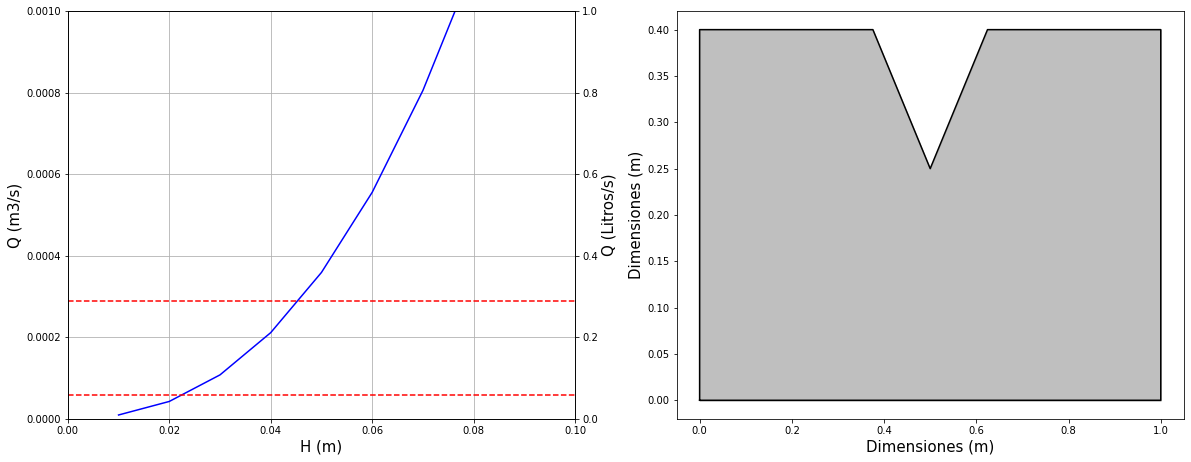

In [144]:
#Cálculo de Vertedero de Pared Delgada. 
#Vertedero de Perfil Triangular
#Ecuación de descarga: Q = m*tan(theta/2)*sqrt(2g)*H^(5/2)
#El coeficiente del gasto es estimado utilizando la reación dada por Hegly (1921)
# m = (0.31 + 0.002/H)

#INPUTS
#angulo de apertura del vertedero
theta = 45   #(deg)
#longitud vertical base justo debajo del vertedero
Lv = 0.25 #(m)


#---------------------------------------------------------
Hmin  = 0.01 #(m)
Hmax  = 0.4-Lv  #(m) 
H = np.arange(Hmin,Hmax+Hmin,Hmin)
m = 0.31 + (0.002/H)

Q = m*np.tan((theta/2)*np.pi/180)*np.sqrt(2*g)*(H**(5/2))

fig, ax = plt.subplots(1,2,figsize=(20,7.5))

ax2 = ax[0].twinx()  
ax2.set_ylim(0,0.001*1000)# np.max(Q)*1000)
ax2.set_ylabel('Q (Litros/s)',fontsize=15)

ax[0].plot(H,Q,'b')
ax[0].set_xlim(0,Hmax)
ax[0].set_ylim(0,0.001)#np.max(Q))
ax[0].set_xlabel('H (m)',fontsize=15)
ax[0].set_ylabel('Q (m3/s)',fontsize=15)
ax[0].grid()


#Dibujo
x2 = (0.4-Lv)*np.tan((theta/2)*np.pi/180)
x = 2*x2

delta = (1-(2*x))/2

x_coords = [0, 1,   1, 1-delta, 0.5, delta,   0, 0]
y_coords = [0, 0, 0.4,     0.4, Lv,   0.4, 0.4, 0]

ax[1].plot(x_coords,y_coords,'k')
ax[1].fill_between(x_coords,y_coords, color='grey', alpha=0.5)
ax[1].set_xlabel('Dimensiones (m)',fontsize=15)
ax[1].set_ylabel('Dimensiones (m)',fontsize=15)

ax[0].axhline(y=0.0576/1000, color="red",linestyle="--")
ax[0].axhline(y=0.288/1000, color="red",linestyle="--")

ax[0].set_xlim(0,0.1)

plt.show()

#### Sistema de Impulsión (Bombeo)

Planteamos la ecuación de Bernoulli entre la superficie libre del estanque y la salida de la tubería.

$$ B_{1} = B_{2} + \Delta h_{f} - H_{B} $$

$$\frac{P_{1}}{\gamma} + \frac{U_{1}^{2}}{2g} + z_{1} = \frac{P_{2}}{\gamma} + \frac{U_{2}^{2}}{2g} + z_{2} + f\frac{L}{D_{2}}\frac{U_{2}^{2}}{2g}- H_{B}$$

$$H_{B} = \frac{U_{2}^{2}}{2g} + z_{2} + f\frac{L}{D_{2}}\frac{U_{2}^{2}}{2g} $$

Usando $Q = U\cdot A $:

$$H_{B} = \frac{Q_{2}^{2}}{2gA_{2}^{2}} + z_{2} + \frac{8fL}{D_{2}^{5}\pi^{2}} Q^{2}$$

$$H_{B} = \frac{Q_{2}^{2}}{2gA_{2}^{2}} + (\Delta H + H_{e}) + \frac{8fL}{D_{2}^{5}\pi^{2}} Q^{2}$$

Potencia Hidráulica: 

$$POT_{hid} = \gamma Q H_{B} $$

Potencia de Freno (Brake Horsepower):
$$POT_{BHP} = \frac{POT_{hid}}{\eta}$$

In [122]:
#Cálculo de in sistema de impulsión
#Potencia de Bomba Requerida


#Inputs
#Caudal de diseño
Q      = 1 #(lt/s)
#Diferencia de cota entre bomba (captación) y estanque
deltaH = 3 #(m)
#Altura del estanque de almacenamiento
H_e    = 1.9 #(m) 
#Diámetro tubería de impulsión 
D2    = 63/1000 #(m) - 63 mm (PVC)
#Longitud (distancia) del tramo a cubrir 
L      = 170 #(m)
#Rugosidad absoluta (Plastico, PVC)
e = 0.0015/1000 #(m)
#Eficiencia de la bomba 
eta = 60/100 #(%)

#------------------------------------------------------------------------------
Q = Q/1000 #(m3/s)
U = Q/(np.pi*(D2**2)/4)

Rey = U*D2/nu




#Método de Newton-Raphson
# Para encontrar el factor de friccion en funcion de e/D y Re
def NewtonRhapson(e_D,Re):
  x0 = 0.03
  for i in range(50):
    if x0 <= 0:
      xx = np.nan
      break
    f = 1/np.sqrt(x0) + 2*np.log10((e_D/3.7)+(2.51/(Re*np.sqrt(x0)))) 
    fprima = -1/np.sqrt(x0**3) - ( (2.51/(Re*np.sqrt(x0**3)))/( (e_D/3.7) + (2.51/(Re*np.sqrt(x0))) )  )*np.log10(np.exp(1))
    dxx = -f/fprima
    if np.abs(dxx/x0) < 1e-6:
      xx = x0
      break
    #elif np.isnan(dxx):
    #  xx = np.nan
    #  break 
    x0 = x0 + dxx
  return xx  


f = NewtonRhapson(e/D2,Rey)


Hb = ((2*(Q**2))/(g*(np.pi**2)*(D2**4))) + (deltaH+H_e) + 8*f*L*(Q**2)/((D2**5)*(np.pi**2)) #(m)

Pot_hid = gamma*Hb*Q #(Watts)
Pot_BHP = Pot_hid/eta #(Watts)

#1 HP = 0,746 kW
Pot_BHP = Pot_BHP/746



print('La potencia requerida es: ',np.round(Pot_BHP,2),' HP')

La potencia requerida es:  0.19  HP
